Text(0, 0.5, 'MSE')

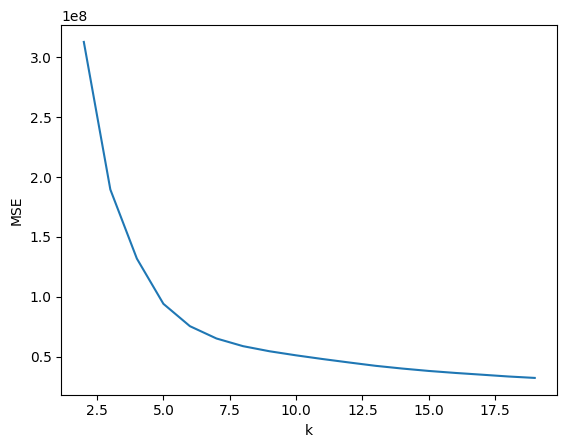

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

img = imread('forest.jpg') 

# Reshape to 2D array of pixels
X = img.reshape(-1,3)

# Vary k and compute MSE
MSE = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.predict(X)
    
    # Quantize image to clusters
    Xq = kmeans.cluster_centers_[labels] 
    
    # Compute MSE
    error = np.sum((X - Xq) ** 2) 
    MSE.append(error)

# Plot elbow curve
plt.plot(range(2,20), MSE)
plt.xlabel('k')
plt.ylabel('MSE')

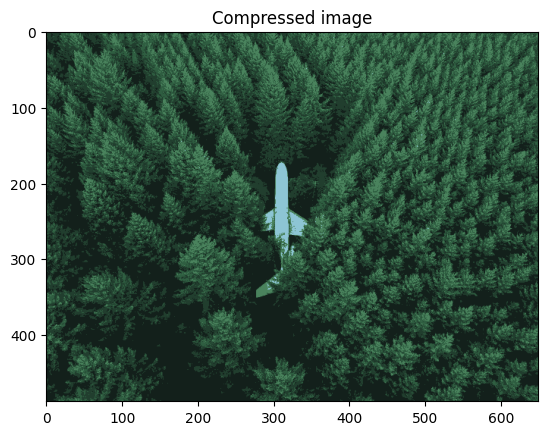

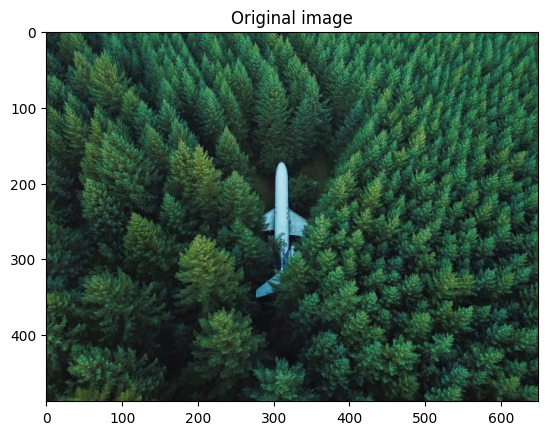

Original size:  951600
Compressed size:  1253.1009103050328


In [23]:
# Select k at elbow    
k = 5

kmeans = KMeans(n_clusters=k).fit(X) 
labels = kmeans.predict(X)
Xq = kmeans.cluster_centers_[labels]

compressed_img = Xq.reshape(img.shape)

compressed_img = compressed_img.astype(np.uint8)

imsave('compressed.jpg', compressed_img)

plt.title('Compressed image')
plt.imshow(compressed_img)
plt.show()

plt.title('Original image')
plt.imshow(img)
plt.show()

print("Original size: ", img.size) 
print("Compressed size: ", k*3*8 + len(img)*np.log2(k))